# FB Phophet Tutorial

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' #nicer rendering of plots in retina displays
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet #version 0.1.1 released on 4/17/17

## Outliers

There are two main ways that outliers can affect Prophet forecasts. Here we make a forecast on the logged Wikipedia visits to the R page from before, but with a block of bad data:

In [2]:
df1 = pd.read_csv('Data/example_wp_R_outliers1.csv')
df1['y'] = np.log(df1['y'])

In [3]:
m8 = Prophet()
m8.fit(df1);

In [4]:
future1 = m8.make_future_dataframe(periods=1096)
forecast8 = m8.predict(future1)

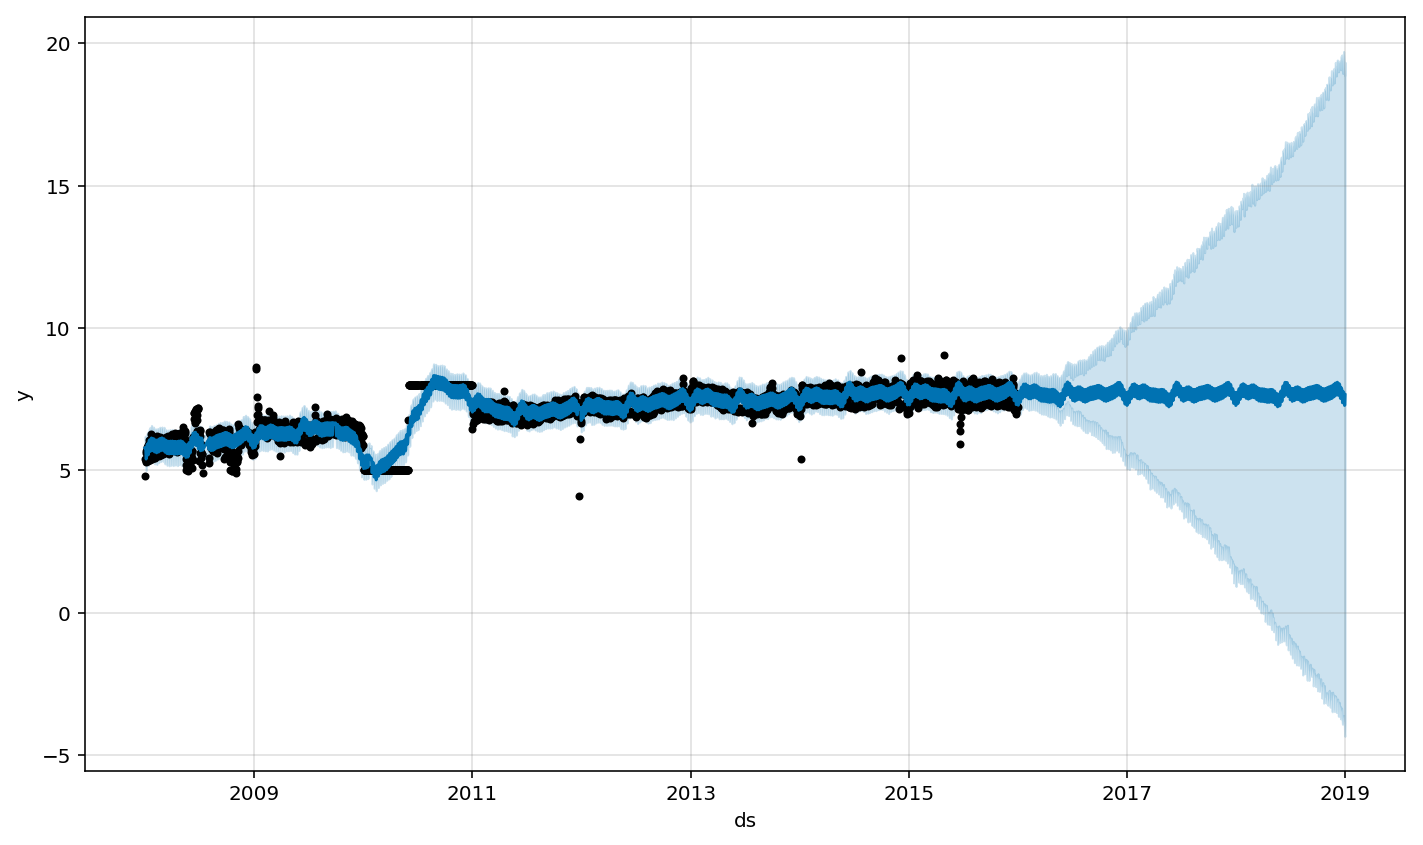

In [5]:
m8.plot(forecast8);

The trend forecast seems reasonable, but the uncertainty intervals seem way too wide. Prophet is able to handle the outliers in the history, but only by fitting them with trend changes. The uncertainty model then expects future trend changes of similar magnitude.

**The best way to handle outliers is to remove them - Prophet has no problem with missing data.** If you set their values to NA in the history but leave the dates in future, then Prophet will give you a prediction for their values.

In [6]:
df1.loc[(df1['ds'] > '2010-01-01') & (df1['ds'] < '2011-01-01'), 'y'] = None
m9 = Prophet().fit(df1);

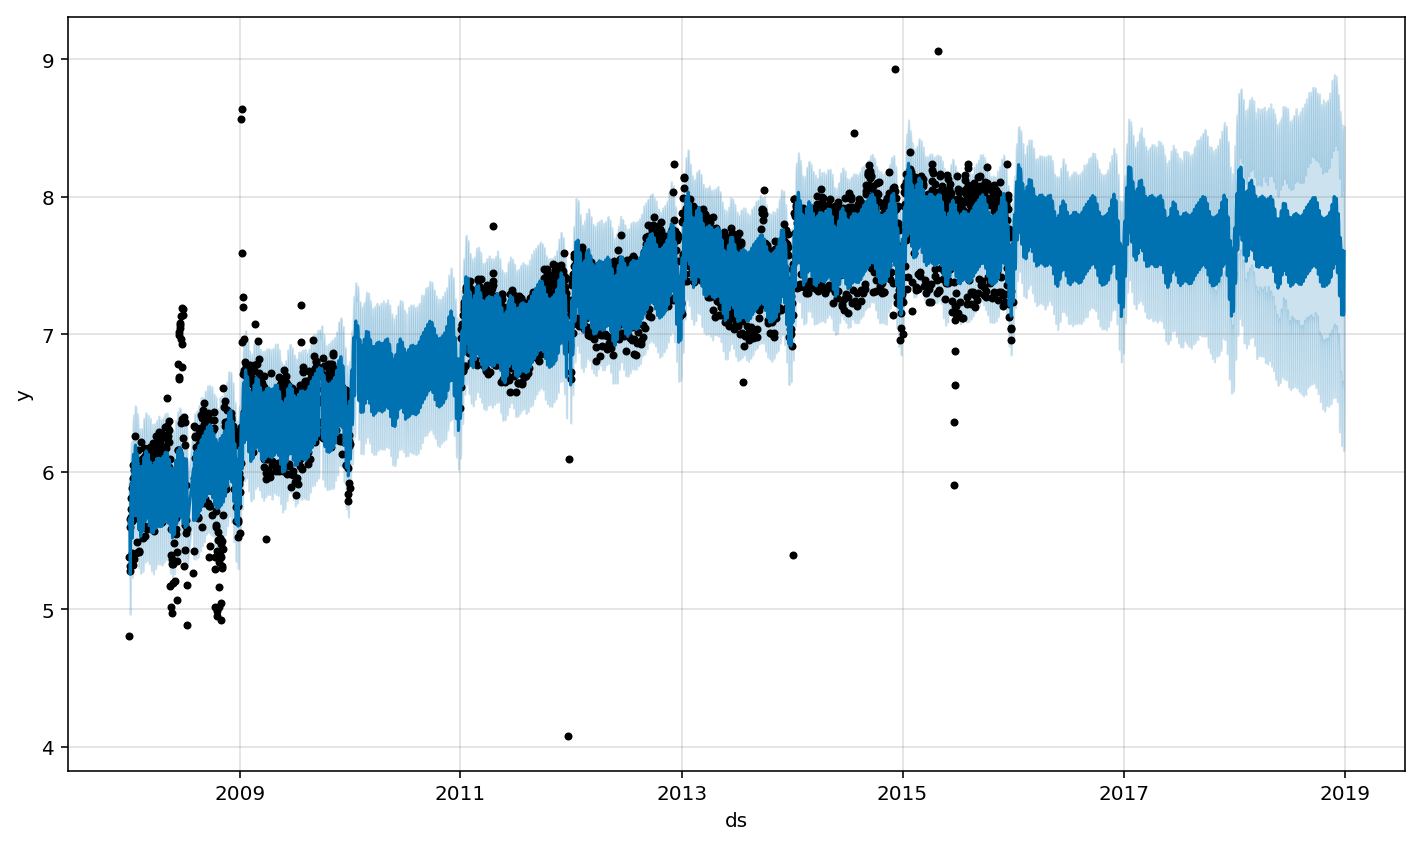

In [7]:
m9.plot(m9.predict(future1));

In the above example the outliers messed up the uncertainty estimation **but did not impact the main forecast yhat. This isn’t always the case**, as in this example with added outliers:

In [8]:
df2 = pd.read_csv('Data/example_wp_R_outliers2.csv')
df2['y'] = np.log(df2['y'])

In [9]:
#I'm not sure why, but this was killing the kernel each time. Checked memory usage, OK. 
#Tried different browser, still a problem. No message before killing kernel. 
#Running Notebook 5.0.0
#Whatever the problem was, it seems to have been fixed in fbprophet version 0.1.1
m10 = Prophet()
m10.fit(df2);

In [10]:
future2 = m10.make_future_dataframe(periods=1096)
forecast10 = m10.predict(future2)

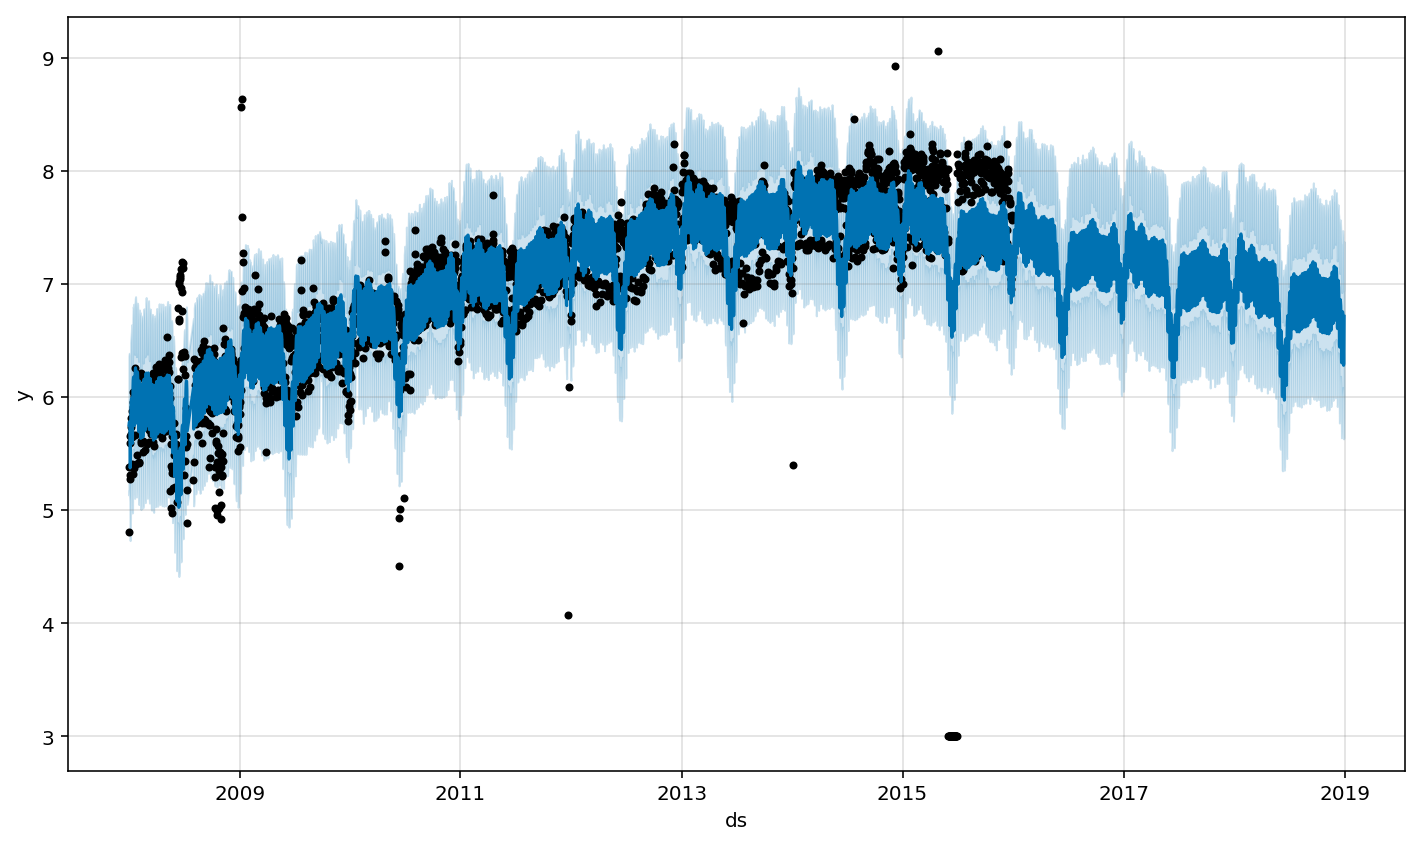

In [11]:
m10.plot(forecast10);

Here a group of **extreme outliers** in June 2015 mess up the seasonality estimate, so their effect reverberates into the future forever. Again the right approach is to remove them:

In [12]:
df2.loc[(df2['ds'] > '2015-06-01') & (df2['ds'] < '2015-06-30'), 'y'] = None
m11 = Prophet().fit(df2)

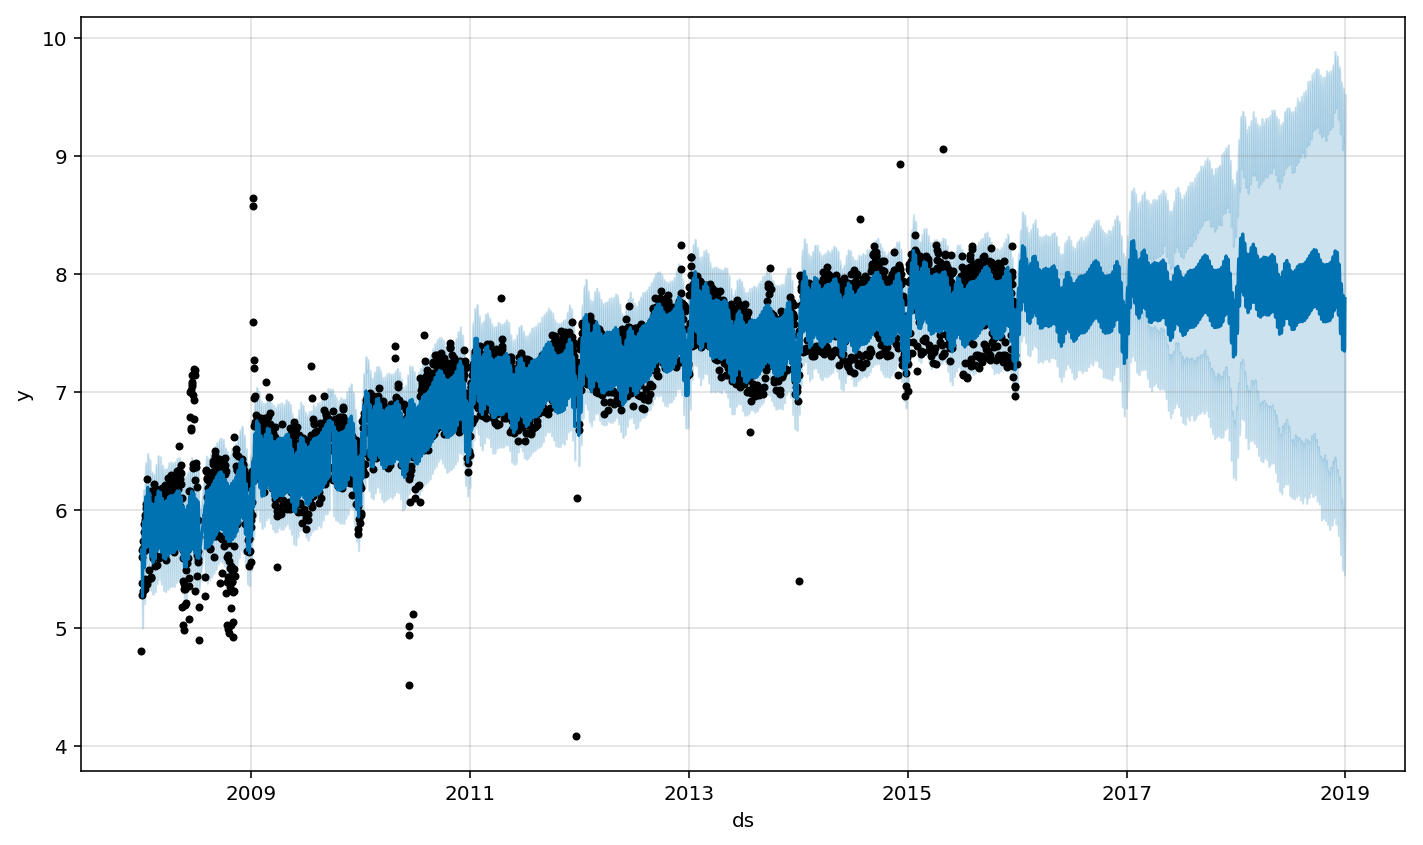

In [13]:
m11.plot(m11.predict(future2));

## Non-Daily Data

Prophet doesn’t strictly require daily data, but you can get **strange results if you ask for daily forecasts from non-daily data** and fit seasonalities. Here we forecast US retail sales volume for the next 10 years:

In [14]:
df_monthly = pd.read_csv('Data/example_retail_sales.csv')

In [15]:
m12 = Prophet().fit(df_monthly);

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [16]:
future_mo = m12.make_future_dataframe(periods=3652)
forecast12 = m12.predict(future_mo)

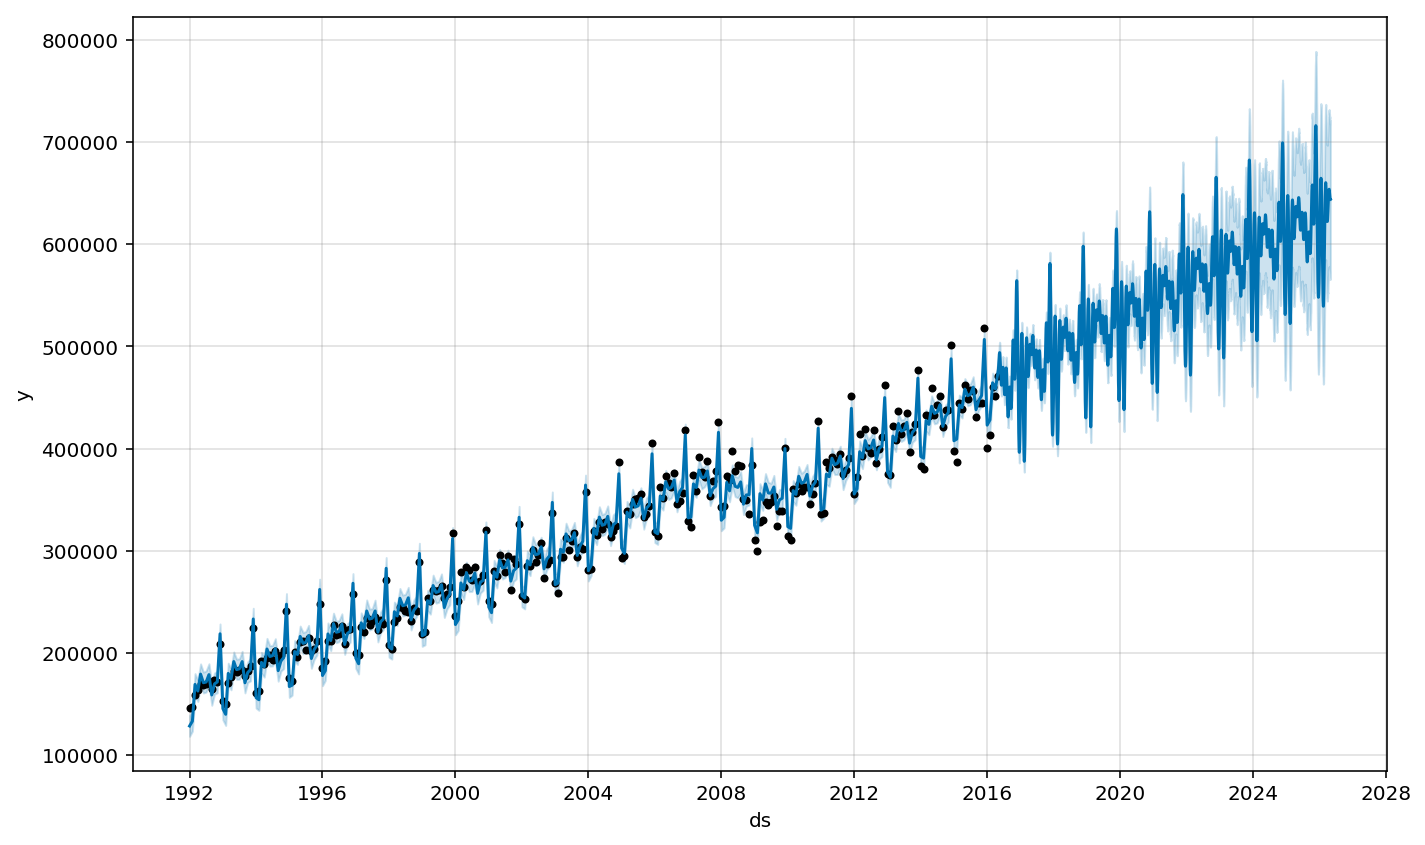

In [17]:
m12.plot(forecast12);

The forecast here seems **very noisy**. What’s happening is that this particular data set only provides monthly data. When we fit the yearly seasonality, it only has data for the first of each month and the seasonality components for the remaining days are unidentifiable and overfit. When you are fitting Prophet to monthly data, only make monthly forecasts, which can be done by **passing the frequency into make_future_dataframe**:

In [18]:
fut_mo = m12.make_future_dataframe(periods=120, freq='M')
forecast_mo = m12.predict(fut_mo)

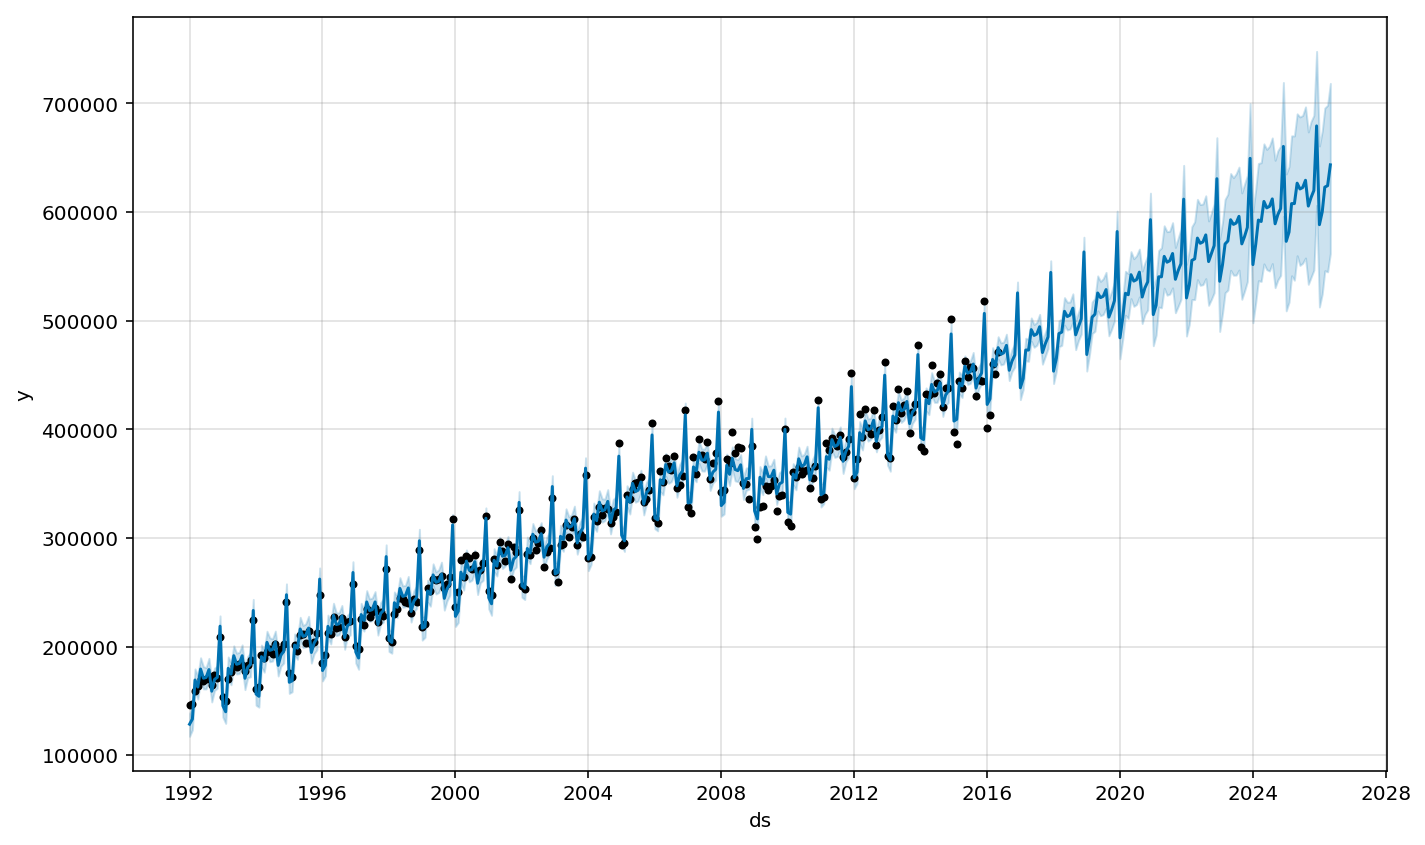

In [19]:
m12.plot(forecast_mo);